In [ ]:
!pip install -U langchain-openai

In [ ]:
!pip install -U langchain-grok

In [ ]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")
    

In [ ]:
#from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4.1",
    # stream_usage=True,
    temperature=0.0,
    max_tokens=1000,
    # timeout=None,
    #reasoning_effort="low",
    # max_retries=2,
    # api_key="...",  # if you prefer to pass api key in directly instead of using env vars
    # base_url="...",
    # organization="...",
    # other params...
)

In [ ]:
messages = [
    (
        "system",
        "You are a helpful assistant",
    ),
    ("human", "give me a mermaid code for a flowchart that shows the steps of making a cup of tea"),
]
ai_msg = llm.invoke(messages)
ai_msg

In [ ]:
AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1000, 'prompt_tokens': 23, 'total_tokens': 1023, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1000, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CaYgRbKNregfu0dMeugBOd7E7ouHk', 'service_tier': 'default', 'finish_reason': 'length', 'logprobs': None}, id='lc_run--59ce94d3-cce5-4e8a-b862-743cd72b4ebc-0', usage_metadata={'input_tokens': 23, 'output_tokens': 1000, 'total_tokens': 1023, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 1000}})
AIMessage(content="**Sachin Tendulkar** is a legendary Indian cricketer, widely regarded as one of the greatest batsmen in the history of cricket. Born on April 24, 1973, in Mumbai, India, Tendulkar made his international debut for India at the age of 16 in 1989. Over a career spanning 24 years, he set numerous records, including being the highest run-scorer in both Test and One Day International (ODI) cricket.\n\nTendulkar is the only player to have scored one hundred international centuries and the first to reach 200 runs in an ODI. He played a pivotal role in India's cricketing successes, including their victory in the 2011 ICC Cricket World Cup. Known for his impeccable technique, discipline, and sportsmanship, Tendulkar inspired generations of cricketers and fans worldwide.\n\nHe retired from international cricket in 2013, finishing with over 34,000 runs across all formats. Tendulkar has received numerous awards, including the Bharat Ratna, India’s highest civilian honor. Beyond cricket, he is involved in philanthropy and continues to contribute to the sport as a mentor and ambassador.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 239, 'prompt_tokens': 24, 'total_tokens': 263, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_d38c7f4fa7', 'id': 'chatcmpl-CaYlYmVBVxw37LYrDZ8nUNXG5nB6z', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--8943e5ca-56d0-4e3f-8ee3-507f4eb2d5a2-0', usage_metadata={'input_tokens': 24, 'output_tokens': 239, 'total_tokens': 263, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})


In [ ]:
print(ai_msg.text)

2) Image Generation

In [ ]:
from openai import OpenAI
import base64

client = OpenAI() 

response = client.responses.create(
    model="gpt-4.1-mini",
    input="Generate an image of gray tabby cat hugging an otter with an orange scarf",
    tools=[{"type": "image_generation"}],
)


#print(response)



#Save the image to a file
image_data = [
    output.result
    for output in response.output
    if output.type == "image_generation_call"
]

if image_data:
    image_base64 = image_data[0]
    with open("cat_and_otter.png", "wb") as f:
        f.write(base64.b64decode(image_base64))

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-5-nano")

tool = {"type": "image_generation", "quality": "high"}

#llm_with_tools = llm.bind_tools([tool])

ai_message = llm.invoke(
    "Draw a picture of a cute fuzzy cat with an umbrella" , tools=[tool]
)

In [ ]:
import base64

from IPython.display import Image

image = next(
    item for item in ai_message.content_blocks if item["type"] == "image"
)
Image(base64.b64decode(image["base64"]), width=200)

In [ ]:

from openai import OpenAI
import base64
client = OpenAI()

# Path to your local image
image_path = "C:\\Users\\Rakesh\\OneDrive\\Desktop\\DNC 11.png"
#  Convert the image to base64
with open(image_path, "rb") as f:
    image_bytes = f.read()
    image_base64 = base64.b64encode(image_bytes).decode("utf-8")
response = client.responses.create(
    model="gpt-5",  
    input=[
        {
            "role": "user",
            "content": [
                {"type": "input_text", "text": "explain what is this image about?"},
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{image_base64}"
                }
            ]
        }
    ]
)
print(response.output_text)

# Getting started with Langchain and Basic prompting


In [ ]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") or getpass(
    "Enter OpenAI API Key: "
)

openai_model = "gpt-4o-mini"


In [ ]:
from langchain_openai import ChatOpenAI

# For normal accurate responses
llm = ChatOpenAI(temperature=0.0, model=openai_model)
llm.invoke("Tell me about rakesh garapati")


In [ ]:
# For unique creative responses
creative_llm = ChatOpenAI(temperature=2.0, model=openai_model)
creative_llm.invoke("Tell me about rakesh garapati")

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.responses.create(
    model="gpt-4.1-mini",
    input=[{
        "role": "user",
        "content": [
            {"type": "input_text", "text": "extract the number from image?"},
            {
                "type": "input_image",
                "image_url": "https://media.istockphoto.com/id/838523142/photo/pickpocket.jpg?s=2048x2048&w=is&k=20&c=sAvC-5iilh7Z0PpqTxRe63K-q6cbyQi2hATC9mrsUGE=",
            },
        ],
    }],
)

print(response.output_text)

In [ ]:
myarticle = """
\
We believe AI's short—to mid-term future belongs to agents and that the long-term future
of *AGI* may evolve from agentic systems. Our definition of agents covers any
neuro-symbolic system in which we merge neural AI (such as an LLM) with semi-traditional
software.

With agents, we allow LLMs to integrate with code — allowing AI to search the web,
perform math, and essentially integrate into anything we can build with code. It should
be clear the scope of use cases is phenomenal where AI can integrate with the broader
world of software.

In this introduction to AI agents, we will cover the essential concepts that make them
what they are and why that will make them the core of real-world AI in the years to
come.

---

## Neuro-Symbolic Systems

Neuro-symbolic systems consist of both neural and symbolic computation, where:

- Neural refers to LLMs, embedding models, or other neural network-based models.
- Symbolic refers to logic containing symbolic logic, such as code.

Both neural and symbolic AI originate from the early philosophical approaches to AI:
connectionism (now neural) and symbolism. Symbolic AI is the more traditional AI.
Diehard symbolists believed they could achieve true AGI via written rules, ontologies,
and other logical functions.

The other camp were the connectionists. Connectionism emerged in 1943 with a theoretical
neural circuit but truly kicked off with Rosenblatt's perceptron paper in 1958 [1][2].
Both of these approaches to AI are fascinating but deserve more time than we can give
them here, so we will leave further exploration of these concepts for a future chapter.

Most important to us is understanding where symbolic logic outperforms neural-based
compute and vice-versa.

| Neural | Symbolic |
| --- | --- |
| Flexible, learned logic that can cover a huge range of potential scenarios. | Mostly hand-written rules which can be very granular and fine-tuned but hard to scale. |
| Hard to interpret why a neural system does what it does. Very difficult or even impossible to predict behavior. | Rules are written and can be understood. When unsure why a particular ouput was produced we can look at the rules / logic to understand. |
| Requires huge amount of data and compute to train state-of-the-art neural models, making it hard to add new abilities or update with new information. | Code is relatively cheap to write, it can be updated with new features easily, and latest information can often be added often instantaneously. |
| When trained on broad datasets can often lack performance when exposed to unique scenarios that are not well represented in the training data. | Easily customized to unique scenarios. |
| Struggles with complex computations such as mathematical operations. | Perform complex computations very quickly and accurately. |

Pure neural architectures struggle with many seemingly simple tasks. For example, an LLM
*cannot* provide an accurate answer if we ask it for today's date.

Retrieval Augmented Generation (RAG) is commonly used to provide LLMs with up-to-date
knowledge on a particular subject or access to proprietary knowledge.

### Giving LLMs Superpowers

By 2020, it was becoming clear that neural AI systems could not perform tasks symbolic
systems typically excelled in, such as arithmetic, accessing structured DB data, or
making API calls. These tasks require discrete input parameters that allow us to process
them reliably according to strict written logic.

In 2022, researchers at AI21 developed Jurassic-X, an LLM-based "neuro-symbolic
architecture." Neuro-symbolic refers to merging the "neural computation" of large
language models (LLMs) with more traditional (i.e. symbolic) computation of code.

Jurassic-X used the Modular Reasoning, Knowledge, and Language (MRKL) system [3]. The
researchers developed MRKL to solve the limitations of LLMs, namely:

- Lack of up-to-date knowledge, whether that is the latest in AI or something as simple
as today's date.
- Lack of proprietary knowledge, such as internal company docs or your calendar
bookings.
- Lack of reasoning, i.e. the inability to perform operations that traditional software
is good at, like running complex mathematical operations.
- Lack of ability to generalize. Back in 2022, most LLMs had to be fine-tuned to perform
well in a specific domain. This problem is still present today but far less prominent as
the SotA models generalize much better and, in the case of MRKL, are able to use tools
relatively well (although we could certainly take the MRKL solution to improve tool use
performance even today).

MRKL represents one of the earliest forms of what we would now call an agent; it is an
LLM (neural computation) paired with executable code (symbolic computation).

## ReAct and Tools

There is a misconception in the broader industry that an AI agent is an LLM contained
within some looping logic that can generate inputs for and execute code functions. This
definition of agents originates from the huge popularity of the ReAct agent framework
and the adoption of a similar structure with function/tool calling by LLM providers such
as OpenAI, Anthropic, and Ollama.

![ReAct agent flow with the Reasoning-Action loop [4]. When the action chosen specifies
to use a normal tool, the tool is used and the observation returned for another
iteration through the Reasoning-Action loop. To return a final answer to the user the
LLM must choose action "answer" and provide the natural language response, finishing
the loop.](/images/posts/ai-agents/ai-agents-00.png)

<small>ReAct agent flow with the Reasoning-Action loop [4]. When the action chosen
specifies to use a normal tool, the tool is used and the observation returned for
another iteration through the Reasoning-Action loop. To return a final answer to the
user the LLM must choose action "answer" and provide the natural language response,
finishing the loop.</small>

Our "neuro-symbolic" definition is much broader but certainly does include ReAct agents
and LLMs paired with tools. This agent type is the most common for now, so it's worth
understanding the basic concept behind it.

The **Re**ason **Act**ion (ReAct) method encourages LLMs to generate iterative
*reasoning* and *action* steps. During *reasoning,* the LLM describes what steps are to
be taken to answer the user's query. Then, the LLM generates an *action,* which we parse
into an input to some executable code, which we typically describe as a tool/function
call.

![ReAct method. Each iteration includes a Reasoning step followed by an Action (tool
call) step. The Observation is the output from the previous tool call. During the final
iteration the agent calls the answer tool, meaning we generate the final answer for the
user.](/images/posts/ai-agents/ai-agents-01.png)

<small>ReAct method. Each iteration includes a Reasoning step followed by an Action
(tool call) step. The Observation is the output from the previous tool call. During the
final iteration the agent calls the answer tool, meaning we generate the final answer
for the user.</small>

Following the reason and action steps, our action tool call returns an observation. The
logic returns the observation to the LLM, which is then used to generate subsequent
reasoning and action steps.

The ReAct loop continues until the LLM has enough information to answer the original
input. Once the LLM reaches this state, it calls a special *answer* action with the
generated answer for the user.

## Not only LLMs and Tool Calls

LLMs paired with tool calling are powerful but far from the only approach to building
agents. Using the definition of neuro-symbolic, we cover architectures such as:

- Multi-agent workflows that involve multiple LLM-tool (or other agent structure)
combinations.
- More deterministic workflows where we may have set neural model-tool paths that may
fork or merge as the use case requires.
- Embedding models that can detect user intents and decide tool-use or LLM
selection-based selection in vector space.

These are just a few high-level examples of alternative agent structures. Far from being
designed for niche use cases, we find these alternative options to frequently perform
better than the more common ReAct or Tool agents. We will cover all of these examples
and more in future chapters.

---

Agents are fundamental to the future of AI, but that doesn't mean we should expect that
future to come from agents in their most popular form today. ReAct and Tool agents are
great and handle many simple use cases well, but the scope of agents is much broader,
and we believe thinking beyond ReAct and Tools is key to building future AI.

---

## References

[1] The curious case of Connectionism (2019) [https://www.degruyter.com/document/doi/10.1515/opphil-2019-0018/html](https://www.degruyter.com/document/doi/10.1515/opphil-2019-0018/html)

[2] F. Rosenblatt, [The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain](https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf) (1958), Psychological Review

[3] E. Karpas et al. [MRKL Systems: A Modular, Neuro-Symbolic Architecture That Combines Large Language Models, External Knowledge Sources and Discrete Reasoning](https://arxiv.org/abs/2205.00445) (2022), AI21 Labs
"""


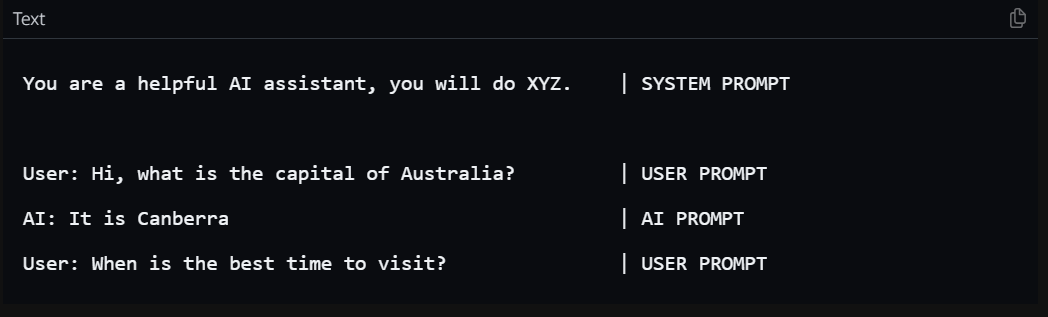

In [ ]:
from langchain_core.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate

# Defining the system prompt (how the AI should act)
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are an AI assistant that helps generate article titles."
)

# the user prompt is provided by the user, in this case however the only dynamic
# input is the article
user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a name for a article.
The article is here  {myarticle}

The name should be based of the context of the article.
Be creative, but make sure the names are clear, catchy,
and relevant to the theme of the article.

Only output the article name, no other explanation or
text can be provided. 

""",
    input_variables=["myarticle"]
)


# easy code

In [ ]:
from langchain_core.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate

# Defining the system prompt (how the AI should act)
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are an AI assistant that helps generate jokes."
)

# the user prompt is provided by the user, in this case however the only dynamic
# input is the article
user_prompt = HumanMessagePromptTemplate.from_template(
    """generate a joke on {myinput}

""",
    input_variables=["myinput"]
)


In [ ]:
from langchain_core.prompts import ChatPromptTemplate

first_prompt = ChatPromptTemplate.from_messages([system_prompt, user_prompt])


In [ ]:
chain_one = (
    {"myinput": lambda x: x["myinput"]}
    | first_prompt  
    | llm
    
)

In [ ]:
print(chain_one.invoke({"myinput": "movies"}))

In [ ]:
#We can display what our formatted human prompt would look like after inserting a value into the article parameter:
user_prompt.format(bio=myarticle)


In [ ]:
from langchain_core.prompts import ChatPromptTemplate

first_prompt = ChatPromptTemplate.from_messages([system_prompt, user_prompt])


In [ ]:
print(first_prompt.format(bio="TEST STRING"))


In [ ]:
chain_one = (
    {"myarticle": lambda x: x["myarticle"]}
    | first_prompt  
    | llm
    | {"generated article_title": lambda x: x.content}
)


In [ ]:
article_title_msg = chain_one.invoke({"myarticle": myarticle})
article_title_msg


In [ ]:
second_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a description for
the article. The article is here for you to examine:

---

{article}

---

Here is the article title '{article_title}'.

Output the SEO friendly article description. Do not output
anything other than the description.""",
    input_variables=["article", "article_title"]
)

second_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    second_user_prompt
])


In [ ]:
chain_two = (
    {
        "article": lambda x: x["article"],
        "article_title": lambda x: x["article_title"]
    }
    | second_prompt    | llm     | {"This is the summary": lambda x: x.content}
)


In [ ]:
article_description_msg = chain_two.invoke({
    "article": myarticle,
    "article_title": article_title_msg["generated article_title"]
})
article_description_msg


### The third step will consume our first article variable and provide several output fields, focusing on helping the user improve a part of their writing. We can specify how the LLM will use structured outputs as we output multiple fields, keeping the generated fields aligned with our requirements.

In [ ]:
third_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a new paragraph for the
article. The article is here for you to examine:

---

{article}

---

Choose one paragraph to review and edit. During your edit,
ensure you provide constructive feedback to the user so they
can learn where to improve their own writing.""",
    input_variables=["article"]
)

# prompt template 3: creating a new paragraph for the article
third_prompt = ChatPromptTemplate.from_messages([
 system_prompt,
 third_user_prompt
])


In [ ]:
from pydantic import BaseModel, Field

class Paragraph(BaseModel):
 original: str = Field(description="The original paragraph")
 edited_paragraph: str = Field(description="The improved edited paragraph")
 feedback: str = Field(description=("Constructive feedback on the original paragraph"))

structured_llm = llm.with_structured_output(Paragraph)


In [ ]:
# chain 3: inputs: article / output: article_para
chain_three = (
    {"article": lambda x: x["article"]}
    | third_prompt
    | structured_llm
      | {
        "original_paragraph": lambda x: x.original,
        "edited_paragraph": lambda x: x.edited_paragraph,
        "feedback": lambda x: x.feedback
    }

)


In [ ]:
out = chain_three.invoke({"article": myarticle})
out


In [ ]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate

image_prompt_article = PromptTemplate(
    input_variables=["article"],
    template=(
        "Generate a prompt with less then 500 characters to generate an image of a daog and pink cat "
        "based on the following article: {article}"
    )
)


In [ ]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate

image_prompt_2 = PromptTemplate(
    input_variables=["animal"],
    template=(
        "Generate a prompt with less then 500 characters to generate an image of a {animal} "
    )
)

In [ ]:
!pip install scikit-image
#!pip install matplotlib

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
from langchain_core.runnables import RunnableLambda

def generate_and_display_image(image_prompt):
 image_url = DallEAPIWrapper().run(image_prompt)
 image_data = io.imread(image_url)

    # And update the display code to:
 plt.imshow(image_data)
 plt.axis('off')
 plt.show()

# we wrap this in a RunnableLambda for use with LCEL
image_gen_runnable = RunnableLambda(generate_and_display_image)


In [ ]:
# chain 4: inputs: article, article_para / outputs: new_suggestion_article
chain_five = (
    {"article": lambda x: x["article"]}
    | image_prompt_article
    | llm
    | (lambda x: x.content)
    | image_gen_runnable
)


In [ ]:
# chain 4: inputs: article, article_para / outputs: new_suggestion_article
chain_six= (
     {"animal": lambda x: x["animal"]}
    | image_prompt_2
    | llm
    | image_gen_runnable
)


In [ ]:
chain_six.invoke({"animal": "elephant"})

In [ ]:
chain_five.invoke({"article": myarticle})


In [ ]:
# ...existing code...
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate
from skimage import io
import matplotlib.pyplot as plt
from langchain_core.runnables import RunnableLambda

def generate_and_display_image(image_prompt: str):
    # generate image url from the API wrapper
    image_url = DallEAPIWrapper().run(image_prompt)
    # read and display the image
    image_data = io.imread(image_url)
    plt.imshow(image_data)
    plt.axis('off')
    plt.show()
    # return the url for downstream use / debugging
    return image_url

# wrap in a runnable for LCEL
image_gen_runnable = RunnableLambda(generate_and_display_image)
# ...existing code...

# ...existing code...
# fixed chain_six: ensure llm output content is extracted before image runnable
chain_seven = (
    {"animal": lambda x: x["animal"]}
    | image_prompt_2
    | llm
    | (lambda x: x.content)   # extract text prompt from llm response
    | image_gen_runnable
)

# invoke with a dict matching the input mapping
chain_seven.invoke({"animal": "zebra"})
# ...existing code...

In [ ]:
image_url = DallEAPIWrapper().run("draw a pic art of animal elephant")

In [ ]:
image_data = io.imread(image_url)
plt.imshow(image_data)
plt.axis('off')
plt.show()
